## import all needed liberary

In [2]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
from skimage.exposure import equalize_adapthist 
from skimage import filters
from skimage import measure
from skimage.draw import polygon
from skimage.restoration import denoise_bilateral

import matplotlib.pyplot as plt
import numpy as np
import math

from skimage.exposure import histogram
from matplotlib.pyplot import bar


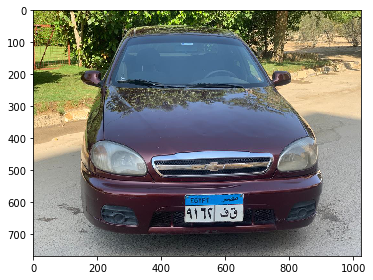

In [3]:
img_data1 = io.imread("dataset\data6.jpeg")

io.imshow(img_data1)

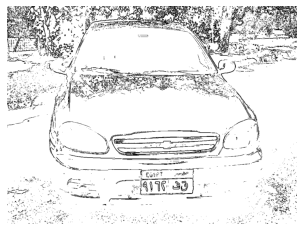

C:\Users\YOUSIF~1\AppData\Local\Temp/ipykernel_15076/2102626647.py:32: UserWarning: result1.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('result1.jpg' , preprocessed_img)


In [13]:
def show_image (img):
    fig = plt.figure()
    plt.gray()
    plt.imshow(img)
    plt.axis('off')
    plt.show()

def image_preprocessing (img):
    '''
        in this function we are going to applying different preprocessing 
        techniques in the input image 

        prams:
                img 
    '''
    gray_img = rgb2gray(img)    # convert image to grayscale 

    equalized_image = equalize_adapthist(gray_img) # applaying histogram equalization 
    
    denoised_imag= denoise_bilateral(equalized_image, sigma_color=0.05, sigma_spatial=15)
    
    sobel_edge = filters.sobel(denoised_imag) # applaying edge detection using sobel algorithm  
    # we need to discuss the best way to get the best threshold 
    result = ((sobel_edge <0.2))  # convert image to binary using thresholding value 

    return result


preprocessed_img = image_preprocessing(img_data1)
show_image(preprocessed_img)

io.imsave('result1.jpg' , preprocessed_img)


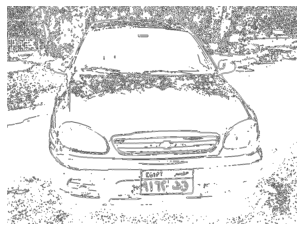

C:\Users\YOUSIF~1\AppData\Local\Temp/ipykernel_15076/3552236209.py:18: UserWarning: result2.jpg is a boolean image: setting True to 255 and False to 0. To silence this warning, please convert the image using img_as_ubyte.
  io.imsave('result2.jpg' , preprocessed_img)


In [14]:
def Get_Contours (img):
    h = img.shape[0]
    w = img.shape[1]
    
    # Getting all contours form the image 
    contours = measure.find_contours(img, 0.8)
    contours_image =255* np.ones((h, w), dtype=np.uint8)
    
    #save contours in an image 
    for contour in contours:
        contours_image[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 0
    show_image(contours_image)

    return  contours_image


contours_image =Get_Contours(preprocessed_img)
io.imsave('result2.jpg' , preprocessed_img)


In [ ]:
def Hough_Transform (img):
    img_shape = img.shape
    # image width and height
    x_max = img_shape[0]
    y_max = img_shape[1]
    
    theta_max = 1.0 * math.pi
    theta_min = 0.0
    
    r_min =0 
    r_max = math.hypot(x_max ,y_max)
    
    r_dim =200
    theta_dim =300
    
    houghSpace = np.zeros((r_dim , theta_dim))
    
    for x in range (x_max):
        for y in range(y_max):
            if img[x,y] ==255:continue
            for itheta  in range (theta_dim):
                theta = 1.0 *  itheta * theta_max /  theta_dim
                r = x * np.cos(theta) + y * np.sin(theta)
                ir = r_dim * (1.0 * r) /r_max
                
                houghSpace[np.round(ir).astype('int'),np.round(itheta).astype('int')]=  houghSpace[np.round(ir).astype('int'),np.round(itheta).astype('int')]+1
 
Hough_Transform(contours_image)               
    
    

In [ ]:
  '''
    ax.imshow(contours_image)
    for contour in contours:
            rr, cc = polygon(contour[:, 0], contour[:, 1], contours_image.shape)
            contours_image[rr, cc] = 0

            ax.plot(contour[:, 1], contour[:, 0], linewidth=2)
    ax.axis('Image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()
    '''